### Singular Value Decomposition

The singular value decomposition (SVD) is a way to decompose a matrix into constituent parts. It is a more general form of the eigendecomposition. While the eigendecomposition is limited to square matrices, the singular value decomposition can be applied to non-square matrices.

SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

Specifically, the SVD decomposes any matrix A into an orthogonal matrix U, a diagonal matrix D, and another orthogonal matrix $UDV^T$. Singular Value Decomposition is the Eigen Value decomposition of $AA^T$.

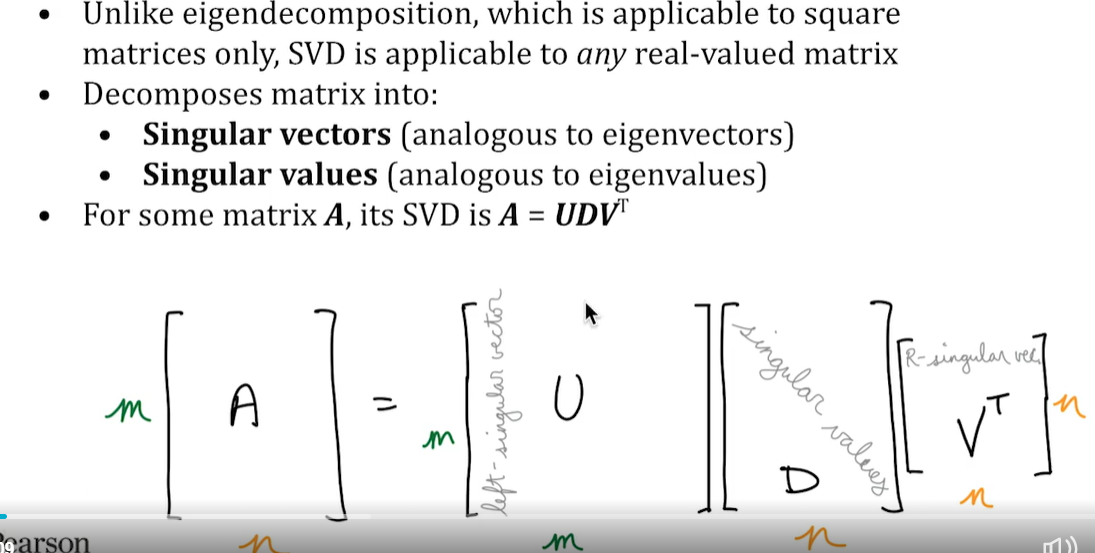

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://learning.oreilly.com/

#### How this works:

Let's look at $AA^T$:

If $A = UDV^T$:

$A^TA =  (VD^TU^T)  (UDV^T) $

Since U is an orthogonal matrix, $U^TU = I$

$A^TA =  V(D^TD)V^T$

and since V is an orthogonal matrix, $V^T = V^{-1}$

$A^TA =  V(D^TD)V^{-1}$


Since $(D^TD)$ is also a diagonal matrix, this is of the form Eigen Decomposition.

<b>Hence Singular value decomposition is a form of Eigen value decomposition that helps us in diagonalizing any matrix (square or non square)</b>


<b>The matrices U and V are column-orthogonal, which means all matrices U, D, and $V^T$ are linearly independent. This is extremely important in data science and machine learning because it allows you to conceptually separate information into distinct and independent concepts.<b>



In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Imagine you had a grocery store selling different products, and you captured all your products as columns in a matrix and all customers as rows. Every row indicates how many items of a certain product a consumer has bought. We assume that buying larger amounts of a certain product indicates a greater preference.

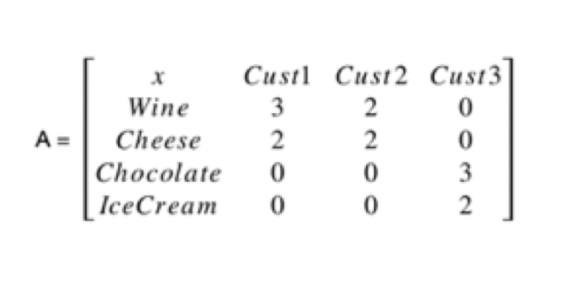

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

In [5]:
A = np.array([[3, 2, 0],[2, 2, 0],[0, 0, 3],[0, 0, 2]])
A

array([[3, 2, 0],
       [2, 2, 0],
       [0, 0, 3],
       [0, 0, 2]])

In [6]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [7]:
U

array([[-0.78820544,  0.        , -0.61541221,  0.        ],
       [-0.61541221,  0.        ,  0.78820544,  0.        ],
       [ 0.        , -0.83205029,  0.        , -0.5547002 ],
       [ 0.        , -0.5547002 ,  0.        ,  0.83205029]])

You can think of U as representing the similarity of various products to certain concepts.

In [8]:
d

array([4.56155281, 3.60555128, 0.43844719])

d represents the strength of that concept.

In [10]:
VT

array([[-0.78820544, -0.61541221, -0.        ],
       [-0.        , -0.        , -1.        ],
       [-0.61541221,  0.78820544,  0.        ]])

$V^T$ encapsulates a concept such as a “wine lover” or a cheese lover.

In this case, it seems to me that there must be something like a “french gourmand” who likes wine and cheese but who doesn’t like sweets and a sweet lover who doesn’t like wine and cheese. The first two column entries in U indicate that wine has a high similarity to the concept of a French gourmand. Sigma shows us that this seems to be a strong concept, and $V^T$ indicates that Customers 1 and 2 strongly associate with this concept.

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible: 

In [23]:
D = np.concatenate((np.diag(d), [[0, 0, 0]]), axis=0)
D

array([[4.56155281, 0.        , 0.        ],
       [0.        , 3.60555128, 0.        ],
       [0.        , 0.        , 0.43844719],
       [0.        , 0.        , 0.        ]])

In [24]:
np.dot(U, np.dot(D, VT)) 

array([[3., 2., 0.],
       [2., 2., 0.],
       [0., 0., 3.],
       [0., 0., 2.]])